
<br>
<p style="text-align: left;"><img src='https://s3.amazonaws.com/weclouddata/images/logos/sunlife_logo.png' width='35%'></p>
<p style="text-align:left;"><font size='10'><b> Machine Learning - Linear Regression</b></font> </p><br> <font color='#559E54' size=6>Instructor Copy</font> </p>
<h2 align='left' > Sunlife Data Science Training </h2>

<h4 align='left'>  Prepared by: <img src='https://s3.amazonaws.com/weclouddata/images/logos/wcd_logo.png' width='15%'>

---


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

%matplotlib inline

/usr/lib64/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib64/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib64/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


---
# <font color='#347B98'> 1. Data Exploration

## $\Delta$ 1.1 Load `Boston Housing` Dataset

1. CRIM: per capita crime rate by town 
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
3. INDUS: proportion of non-retail business acres per town 
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
5. NOX: nitric oxides concentration (parts per 10 million) 
6. RM: average number of rooms per dwelling 
7. AGE: proportion of owner-occupied units built prior to 1940 
8. DIS: weighted distances to five Boston employment centres 
9. RAD: index of accessibility to radial highways 
10. TAX: full-value property-tax rate per `$10,000` 
11. PTRATIO: pupil`-`teacher ratio by town 
12. B: 1000(Bk `-` 0.63)^2 where Bk is the proportion of blacks by town 
13. LSTAT: `%` lower status of the population 
14. MEDV: Median value of owner-occupied homes in $1000's

In [2]:
import pandas as pd

In [2]:
boston_df = pd.read_csv("https://s3.amazonaws.com/weclouddata/datasets/random/Boston.csv")
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## $\Delta$ 1.2 - Data Exploration


### $\delta$ 1.2.1 - Describing Data


In [3]:
boston_df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### $\delta$ 1.2.2 - Correlation Analysis
> HINT: 
> - `df.corr()` for correlation matrix
> - and `seaborn heatmap` for visualization

In [4]:
#########################
## YOUR CODE
#########################

# 1. Use the dataframe method to calculate the correlation matrix
# 2. Use seaborn's heatmap method to plot the correlation matrix heatmap

boston_corr = boston_df.corr()

In [5]:
boston_corr

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [6]:
sns.set(rc={'figure.figsize':(8,6)})

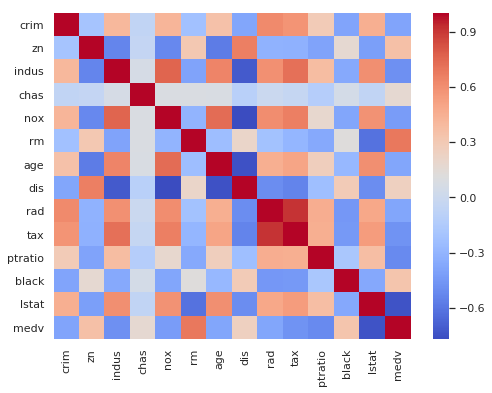

In [7]:
from matplotlib import cm
sns.heatmap(boston_corr, cmap=cm.coolwarm)

### $\delta$ 1.2.3 - Scatter Matrix
> HINT: `pandas.plotting.scatter_matrix`

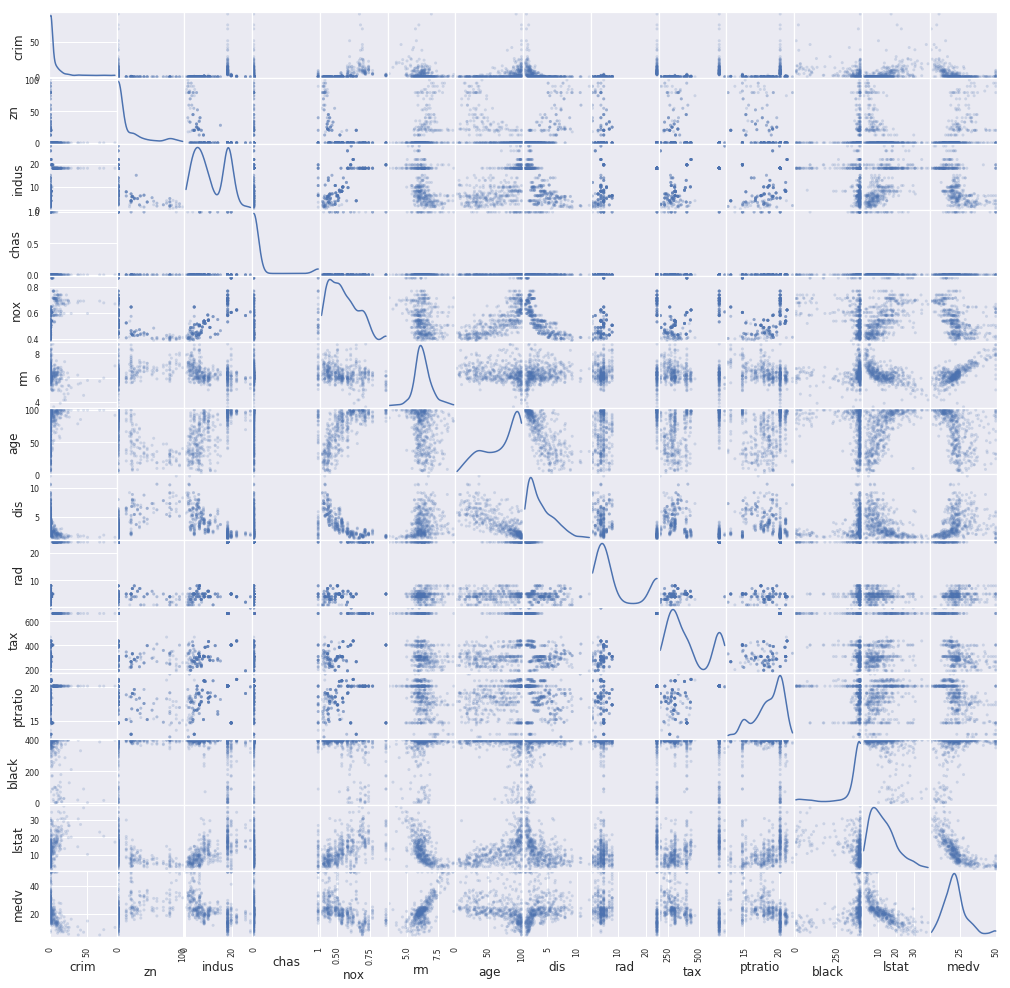

In [8]:
#########################
## YOUR CODE
#########################

# 1. Use pandas to plot a scatter matrix

from pandas.plotting import scatter_matrix
scatter_matrix = scatter_matrix(boston_df, alpha=0.2, figsize=(17,17), diagonal='kde')

### $\delta$ 1.2.4 - Pairplot
> HINT: `seaborn.pairplot`

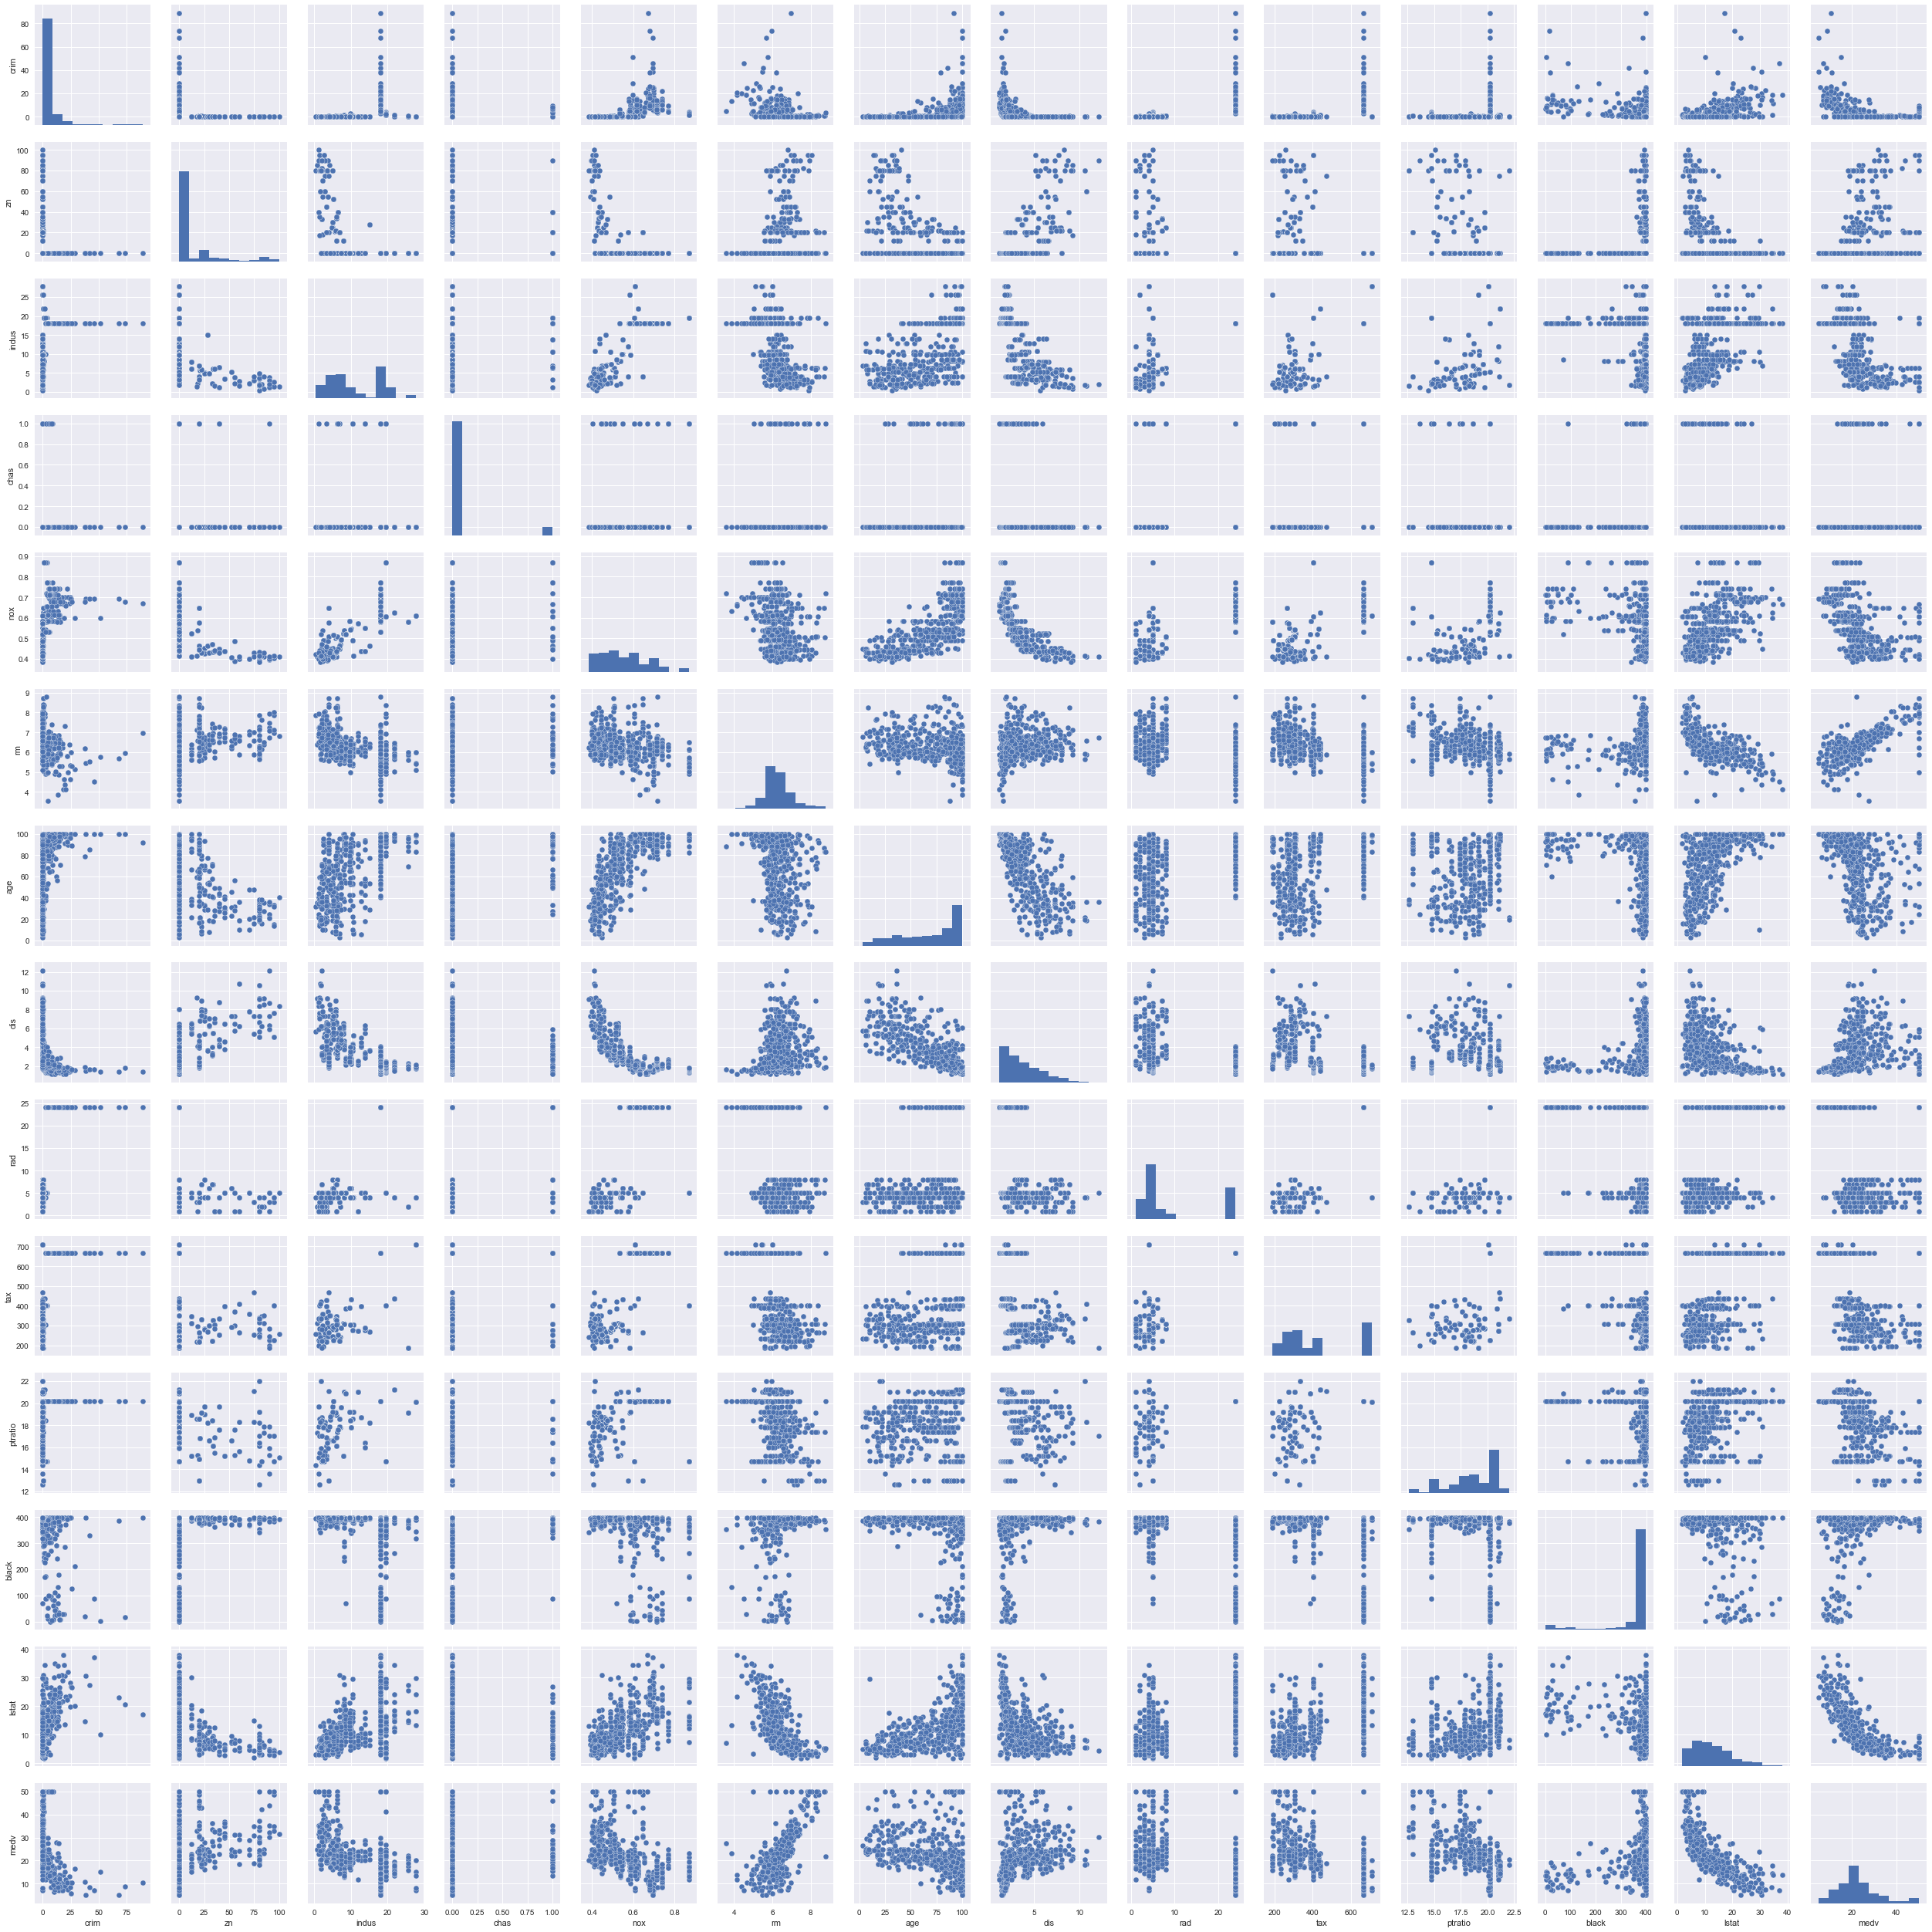

In [32]:
#######################
## YOUR CODE BELOW
#######################

# 1. Try seaborn's pairplot to generate scatter matrix similar to pandas's

sns.pairplot(boston_df)

---
# <font color='#347B98'> 2. Data Preprocessing

## $\Delta$ 2.1 - Target/Feature Definition


In [9]:
X = boston_df[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad','tax', 'ptratio', 'black', 'lstat']]

In [10]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [17]:
# The "medv" column will be used as our regression target variable

y = boston_df["medv"].values
y[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

## $\Delta$ 2.2 - Train/Test Split


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
#########################
## YOUR CODE
#########################

# 1. Use "train_test_split" function to split data into X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4)

In [20]:
print("Train_X: {}".format(X_train.shape))
print("Test_X: {}".format(X_test.shape))
print("Train_y: {}".format(y_train.shape))
print("Test_y: {}".format(y_test.shape))

Train_X: (354, 13)
Test_X: (152, 13)
Train_y: (354,)
Test_y: (152,)


## $\Delta$ 2.3 - Feature Scaling

> NOTE: feature preparation and engineering will be a separate topic. In this regression tutorial, we will only normalize the numeric features. 

`StandardScaler` should be fitted on training data and then transformations applied to both training and testing sets. 

In [21]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)
X_train_ss = ss.transform(X_train)
X_test_ss = ss.transform(X_test)

/folders/myfolders/.local/lib/python3.5/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/lib64/python3.5/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """
/usr/lib64/python3.5/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [22]:
X_train_ss

array([[-0.42546852, -0.47076769, -0.95468627, ...,  0.00545961,
         0.44188904, -0.44481854],
       [-0.42632345,  2.99257588, -1.3301574 , ...,  1.61604587,
         0.28749838, -0.66643827],
       [-0.3851898 , -0.47076769, -0.7058275 , ..., -0.50072464,
         0.42371255,  1.22650481],
       ...,
       [ 0.62797244, -0.47076769,  1.02599668, ...,  0.78774436,
         0.44188904,  1.42695069],
       [-0.42164728, -0.47076769, -1.01872011, ..., -0.86885864,
         0.40170367, -0.44199536],
       [-0.42068632, -0.47076769,  2.12475908, ...,  0.28156011,
         0.23592534,  0.72821331]])

---
# <font color='#347B98'> 4. Linear Regression with StatsModels
    
`sklearn.linear_model.LinearRegression` and `statsmodels.api.OLS` are two commons modules used for fitting regression models. In this section, we will introduce `statsmodels` which provide more statistical testing metrics compared to `sklearn` that focuses on prediction

### Install StatsModels for Python
[Statsmodel Installation Guide](http://statsmodels.sourceforge.net/devel/install.html)

`$` pip install cython  
`$` git clone git://github.com/statsmodels/statsmodels.git  
`$` python setup.py install


In [23]:
import pandas as pd
import numpy as np
import scipy as sp
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

## $\Delta$ 4.1 - Fit `Statsmodels`

In [24]:
X_train = sm.add_constant(X_train)  # add the intercept term
X_test = sm.add_constant(X_test)  # add the intercept term

/folders/myfolders/.local/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [25]:
ols = sm.OLS(y_train, X_train).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     77.06
Date:                Fri, 10 May 2019   Prob (F-statistic):           6.42e-93
Time:                        11:57:52   Log-Likelihood:                -1024.2
No. Observations:                 354   AIC:                             2076.
Df Residuals:                     340   BIC:                             2130.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.3570      5.678      6.403      0.000      25.188      47.526
crim          -0.1226      0.036     -3.428      0.001      -0.193      -0.052
zn             0.0557      0.016      3.547      0.000       0.025       0.087
indus         -0.0088      0.070     -0.127      0.899      -0.146       0.128
chas           4.6934      1.113      4.217      0.000       2.504       6.883
nox          -14.4358      4.211     -3.428      0.001     -22.719      -6.153
rm             3.2801      0.495      6.625      0.000       2.306       4.254
age           -0.0034      0.015     -0.224      0.823      -0.034       0.027
dis           -1.5521      0.227     -6.838      0.000      -1.999      -1.106
rad            0.3262      0.074      4.395      0.000       0.180       0.472
tax           -0.0141      0.004     -3.308      0.001      -0.022      -0.006
ptratio       -0.8033      0.144     -5.597      0.000      -1.086      -0.521
black          0.0094      0.003      3.139      0.002       0.003       0.015
lstat         -0.5235      0.058     -9.032      0.000      -0.637      -0.409
==============================================================================
Omnibus:                      132.494   Durbin-Watson:                   1.669
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              542.712
Skew:                           1.593   Prob(JB):                    1.42e-118
Kurtosis:                       8.162   Cond. No.                     1.50e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## $\Delta$ 4.2 - Predict and Evaluate

In [26]:
y_test_pred = ols.predict(X_test)

In [27]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.7121818377409193

In [28]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_test_pred)

30.05399330712416

---
# <font color='#347B98'> 5. Linear Regression with Sklearn

## $\Delta$ 5.1 - Build the model object

### Instantiate the model with default parameters

In [29]:
reg = LinearRegression()

## $\Delta$ 5.2 - Model Fitting on Training

### Fit the model

In [30]:
reg.fit(X_train_ss, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Print the model `coefficient` (weights|parameters)

In [31]:
reg.coef_

array([-1.08673085,  1.28610283, -0.0607036 ,  1.03108551, -1.6887816 ,
        2.16731202, -0.09530735, -3.32627056,  2.88971894, -2.39272265,
       -1.74561418,  0.85424206, -3.70842299])

## $\Delta$ 5.3 - Prediction on Testing Set

In [32]:
test_pred = reg.predict(X_test_ss)

In [33]:
test_pred[:10]

array([11.07380893, 26.47910329, 17.34489869, 19.1948608 , 36.36170735,
       24.77095832, 31.00051311, 19.94226881, 19.22375105, 24.42998435])

## $\Delta$ 5.4 - Regression Model Evaluation

### R-square

In [34]:
from sklearn.metrics import r2_score
r2_score(y_test, reg.predict(X_test_ss))

0.7121818377409188

### MSE

In [35]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, reg.predict(X_test_ss))

30.053993307124212

---
# <font color='#347B98'> 6. Regression Model Evaluation Metrics

There're several different metrics to evaluate the performance of a regression model. 

### <font color='#FC7307'> $\delta$ SSE
`Sum of Squared Errors (SSE)`
  - $SSE = \sum_{i=1}^{m} {(y_{i} - \hat{y_{i}})^{2}}$ 
  
SSE is measure of how far off our model's predictions are from the observed values. A value of 0 indicates perfect predictions. A non-zero value indicates errors. We expect a non-zero value because there is almost always irreducible error that we just can't get around unless we're dealing with some trivial problem. 

**Keep in mind the errors are squared**

*Why is that?*

Answer: squaring the values makes them all positive. If we didn't square them, then we'd have some positive and some negative values. No matter how you slice it, you end up with error that looks smaller than it is in reality. 

*But why not use absolute error instead of squared error?*

If you think about what squaring does to large numbers you'll realize that we're really penalizing large errors. A single point that deviates from the general trend can cause large squared errors. These anomalous points are called outliers. 

### <font color='#FC7307'> $\delta$  SST

`Total Sum of Squares (SST)`
  - $SST = \sum_{i=1}^{m} (y - \bar{y})^{2}$
  
SST is a measure of the variance in the target variable. It is measured simply as the sum of each observation from the target mean.

### <font color='#FC7307'> $\delta$ $R^{2}$
    
`$R^{2}$`
  - $R^{2} = 1 - \frac{SSE}{SST}$

R-squared measures how much variance is captured by the model. The range for Ordinary Least Squares is [0,1]. It is possible to get negative values for $R^{2}$ but that would require a fitting procedure other than OLS or non-linear data. 

### <font color='#FC7307'> $\delta$ Adjusted $R^{2}$
    
`adj $R^{2}$`
  - adj $R^{2} = 1 - \frac{SSE*df_{t}}{SST*df_{e}}$  

Adjusted $R^{2}$ is the same as standard $R^{2}$ except that it penalizes models when additional features are added. 
> **$R^{2}$ is a poor metric**
> - $R^{2}$ will only go up as additional features are added, even if they provide the model no new predictive power. See the example below.

### <font color='#FC7307'> $\delta$ Mean Squared Error (MSE)
    
`Mean Squared Error (MSE)` is the mean of the squared errors
  - $\frac{1}{n} \sum_{i=1}^{m} (y - \bar{y})^{2}$

### <font color='#FC7307'> $\delta$ Mean Absolute Error (MAE)
    
`Mean Absolute Error (MAE)` is the mean of the absolute value of the errors
  - $\frac{1}{n} \sum_{i=1}^{m} |y - \bar{y}|$
  
### <font color='#FC7307'> $\delta$ Root Mean Squared Error (RMSE)

`Root Mean Squared Error (RMSE)` is the square root of the mean of the squared errors
  - $\sqrt{\frac{1}{n} \sum_{i=1}^{m} (y - \bar{y})^{2}}$

## $\Delta$ 6.1 - Metrics Functions


In [36]:
def sse(data, target, model):
    '''returns sum of squared errors (model vs actual)'''
    squared_errors = (target - model.predict(data)) ** 2
    return np.sum(squared_errors)

def sst(data, target, model):
    '''returns total sum of squared errors (actual vs avg(actual))'''
    avg_y = np.mean(target)
    squared_errors = (target - avg_y) ** 2
    return np.sum(squared_errors)

def r_squared(m_sse, m_sst):
    '''returns calculated value of adjusted r^2'''
    return 1 - m_sse/m_sst

def adj_r_squared(m_sse, m_sst, nrows, ncols):
    '''returns calculated value of adjusted r^2'''
    return 1 - (m_sse/(nrows - ncols - 1)) / (m_sst/(nrows - 1))

## $\Delta$ 6.2 - Calculate Metrics - Manually

In [37]:
reg = LinearRegression()
reg.fit(X_train_ss, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [38]:
m_sse = sse(X_test_ss, y_test, reg)
m_sst = sst(X_test_ss, y_test, reg)
m_rsq = r_squared(m_sse, m_sst)
m_adj_rsq = adj_r_squared(m_sse, m_sst, X_test.shape[0], X_test.shape[1])

In [39]:
print('sse: {}'.format(m_sse))
print('sst: {}'.format(m_sst))
print('r-squares: {}'.format(m_rsq))
print('adjusted r-squares: {}'.format(m_adj_rsq))

sse: 4568.20698268288
sst: 15871.850986842106
r-squares: 0.7121818377409188
adjusted r-squares: 0.6827697627655382


## $\Delta$ 6.3 - Calculate Metrics - `sklearn.metrics`

In [40]:
#######################
## YOUR CODE BELOW
#######################

# 1. Use methods in sklearn.metrics module to calcuate R^2, MAE, MSE, RMSE 

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

y_test_pred = reg.predict(X_test_ss)

print('R-square: {}'.format(r2_score(y_test, y_test_pred)))
print('MAE: {}'.format(mean_absolute_error(y_test, y_test_pred)))
print('MSE: {}'.format(mean_squared_error(y_test, y_test_pred)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test, y_test_pred))))


R-square: 0.7121818377409188
MAE: 3.8590055923707465
MSE: 30.053993307124212
RMSE: 5.482152251362982


<font color='#D61A46'>
**NOTE**: 
- MSE is more popular than MAE because MSE "punishes" larger errors. 
- RMSE is even more popular than MSE because RMSE is interpretable in the "y" units.

---
# <font color='#347B98'> 7. Regression Model Assumptions Check

## $\Delta$ 7.1 - Linearity Check
> Assumption: Relationships between predictors and target are linear

A **`residuals plot`** shows the residuals on the vertical axis and the independent variable on the horizontal axis. If the points are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data; otherwise, a non-linear model is more appropriate.

In [41]:
def residuals_vs_fitted(fitted, residuals, xlabel, ylabel):
    plt.subplot(111)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.scatter(fitted, residuals, marker='o', s=50, alpha=0.5)
    polyline = np.poly1d(np.polyfit(fitted, residuals, 2))    # model non-linearity with quadratic
    xs = range(int(np.min(fitted)), int(np.max(fitted)))
    plt.plot(xs, polyline(xs), color='g', linewidth=5, alpha=0.5)    

def qq_plot(residuals):
    sm.qqplot(residuals)

def standardize(xs):
    xmean = np.mean(xs)
    xstd = np.std(xs)
    return (xs - xmean) / xstd

In [42]:
y_test_pred = reg.predict(X_test_ss) # reg3 is the model fitted with all input variables
residuals = y_test - y_test_pred
std_residuals = standardize(residuals)

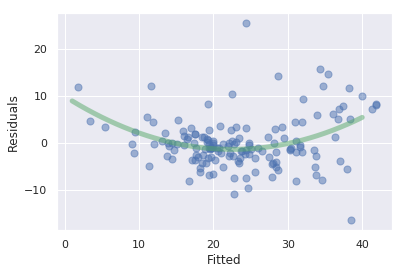

In [43]:
residuals_vs_fitted(y_test_pred, residuals, "Fitted", "Residuals")

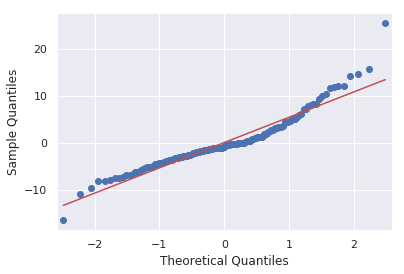

In [44]:
fig = sm.qqplot(residuals, dist="norm", line="r")

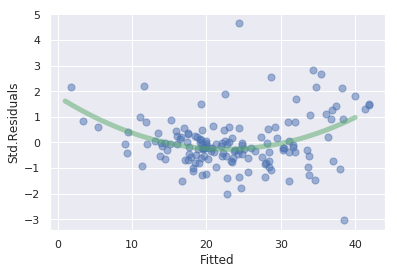

In [45]:
residuals_vs_fitted(y_test_pred, std_residuals, "Fitted", "Std.Residuals")

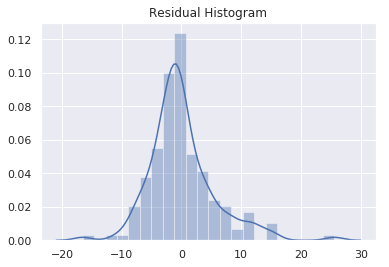

In [46]:
import seaborn as sns

sns.distplot(residuals);
plt.title('Residual Histogram')
plt.show()

In [47]:
poly = Pipeline([('poly', PolynomialFeatures(degree=2)),
                  ('linear', LinearRegression(fit_intercept=False))])

In [48]:
poly.fit(X_train_ss, y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linear', LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False))])

In [49]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

y_test_pred_poly = poly.predict(X_test_ss)

print('R-square: {}'.format(r2_score(y_test, y_test_pred_poly)))
print('MAE: {}'.format(mean_absolute_error(y_test, y_test_pred_poly)))
print('MSE: {}'.format(mean_squared_error(y_test, y_test_pred_poly)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test, y_test_pred_poly))))

R-square: 0.8580539226232617
MAE: 2.633806722536175
MSE: 14.822019659804925
RMSE: 3.8499376176510864


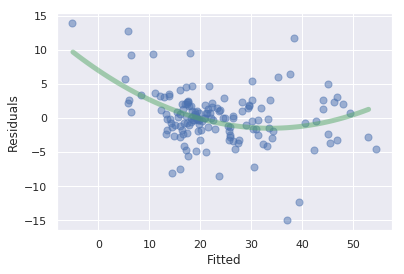

In [50]:
y_test_pred_poly = poly.predict(X_test_ss)
residuals_poly = y_test - y_test_pred_poly
std_residuals_poly = standardize(residuals_poly)

residuals_vs_fitted(y_test_pred_poly, residuals_poly, "Fitted", "Residuals")

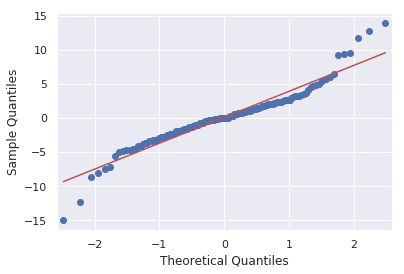

In [51]:
fig = sm.qqplot(residuals_poly, dist="norm", line="r")

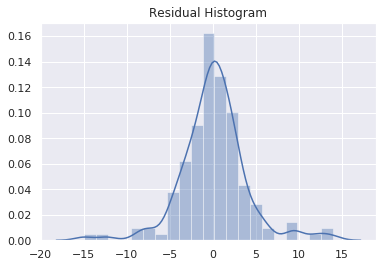

In [52]:
import seaborn as sns

sns.distplot(residuals_poly);
plt.title('Residual Histogram')
plt.show()

---
# <font color='#347B98'> 8. Try Lasso/Ridge Regression on the same data

In [53]:
polynomial = PolynomialFeatures(degree=2)
polynomial.fit(X_train_ss)
X_train_ss_poly = polynomial.transform(X_train_ss)
X_test_ss_poly = polynomial.transform(X_test_ss)

## $\Delta$ 8.1 - Lasso

** Questions **
1. Fit a lasso regression
2. Calculate R-square and MSE statistics
3. Plot the coefficients in a bar plot
4. Modifying the alpha and observe the changes made in the coefficient bar plot

In [54]:
#######################
## YOUR CODE BELOW
#######################

# 1. Fit Lasso Regression
# 2. Calculate R^2 and MSE
# 3. Plot the coefficients using a bar plot
# 3. Tune the alpha parameter and observe the changes to coefficients

from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=0.0005,normalize=True, max_iter=1e5)
lassoreg.fit(X_train_ss_poly,y_train)
test_pred_poly_lasso = lassoreg.predict(X_test_ss_poly)
print("Lasso R^2: {}".format(r2_score(y_test, test_pred_poly_lasso)))
print("Lasso MSE: {}".format(mean_squared_error(y_test, test_pred_poly_lasso)))

Lasso R^2: 0.8828547165735938
Lasso MSE: 12.232318962863832


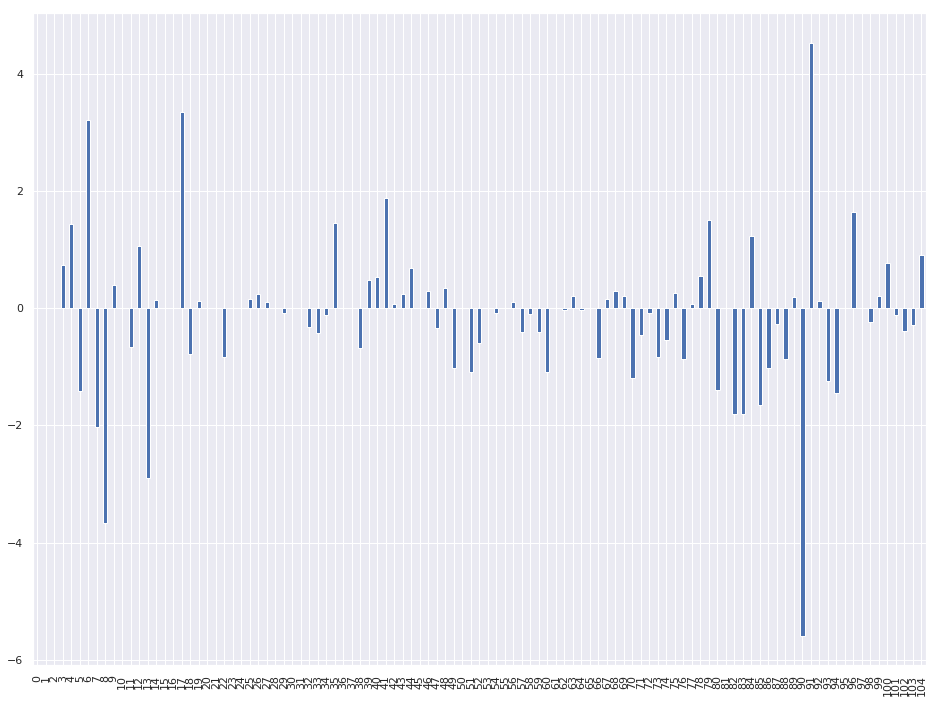

In [55]:
pd.Series(lassoreg.coef_).plot(kind='bar', figsize=(16,12))

## $\Delta$ 8.2 - Ridge

** Questions **
1. Fit a ridge regression
2. Calculate R-square and MSE statistics
3. Plot the coefficients in a bar plot
4. Modifying the alpha and observe the changes made in the coefficient bar plot

In [56]:
#######################
## YOUR CODE BELOW
#######################

# 1. Fit Ridge Regression
# 2. Calculate R^2 and MSE
# 3. Plot the coefficients using a bar plot
# 3. Tune the alpha parameter and observe the changes to coefficients

from sklearn.linear_model import Ridge
rdige_reg = Ridge(alpha=0.05,normalize=True, max_iter=1e5)
rdige_reg.fit(X_train_ss_poly,y_train)
test_pred_poly_ridge = rdige_reg.predict(X_test_ss_poly)
print("Ridge R^2: {}".format(r2_score(y_test, test_pred_poly_ridge)))
print("Ridge MSE: {}".format(mean_squared_error(y_test, test_pred_poly_ridge)))

Ridge R^2: 0.8840273336569251
Ridge MSE: 12.10987420226345


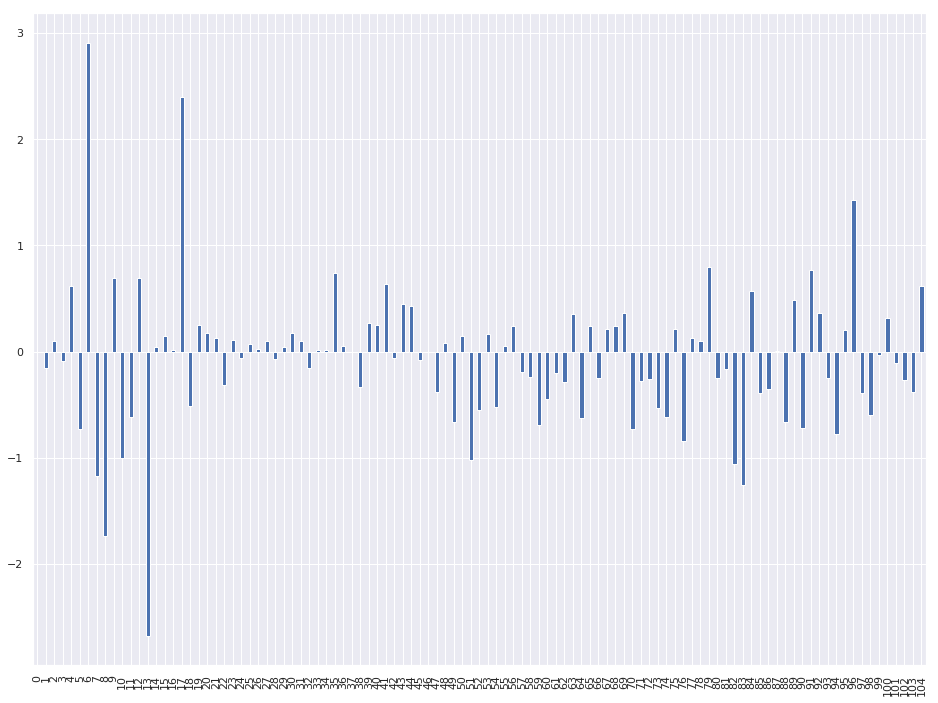

In [57]:
pd.Series(rdige_reg.coef_).plot(kind='bar', figsize=(16,12))